In [1]:
import pandas as pd
import polars as pl
import numpy as np
import random
import string
import time
import matplotlib.pyplot as plt

# 随机数据生成
def generate_data(num_rows, num_columns):
    """生成一个包含 num_rows 行和 num_columns 列的随机数据集"""
    data = {}
    for i in range(num_columns):
        column_name = f"col_{i}"
        # 随机选择数据类型
        if i % 4 == 0:
            data[column_name] = np.random.rand(num_rows)  # 浮动数值
        elif i % 4 == 1:
            data[column_name] = np.random.randint(0, 100, num_rows)  # 整数
        elif i % 4 == 2:
            data[column_name] = [random.choice(string.ascii_uppercase) for _ in range(num_rows)]  # 字符串
        else:
            data[column_name] = np.random.choice([True, False], num_rows)  # 布尔值
    return data

# 生成数据集
num_rows = 10**6  # 1百万行数据
num_columns = 10  # 10列数据
data = generate_data(num_rows, num_columns)

# Pandas 数据集
df_pandas = pd.DataFrame(data)

# Polars 数据集
df_polars = pl.DataFrame(data)


In [4]:
# 定义一个测试函数来执行常见的数据操作
def test_pandas_operations(df):
    start = time.time()
    df_filtered = df[df['col_0'] > 0.5]  # 筛选操作
    filter_time = time.time() - start

    start = time.time()
    df_grouped = df.groupby('col_1').agg({'col_0': 'mean'})  # 分组聚合
    group_time = time.time() - start

    start = time.time()
    df_sorted = df.sort_values(by='col_2')  # 排序操作
    sort_time = time.time() - start

    start = time.time()
    df_concat = pd.concat([df, df], axis=0)  # 数据连接
    concat_time = time.time() - start

    start = time.time()
    df_sum = df['col_0'].sum()  # 数值计算
    sum_time = time.time() - start

    return filter_time, group_time, sort_time, concat_time, sum_time

def test_polars_operations(df):
    start = time.time()
    df_filtered = df.filter(pl.col('col_0') > 0.5)  # 筛选操作
    filter_time = time.time() - start

    start = time.time()
    df_grouped = df.group_by('col_1').agg(pl.col('col_0').mean())  # 分组聚合
    group_time = time.time() - start

    start = time.time()
    df_sorted = df.sort('col_2')  # 排序操作
    sort_time = time.time() - start

    start = time.time()
    df_concat = pl.concat([df, df])  # 数据连接
    concat_time = time.time() - start

    start = time.time()
    df_sum = df.select(pl.col('col_0').sum())  # 数值计算
    sum_time = time.time() - start

    return filter_time, group_time, sort_time, concat_time, sum_time


In [5]:
# 测试不同数据集规模下的执行时间
row_sizes = [10**4, 10**5, 10**6]  # 不同大小的数据集
pandas_times = []
polars_times = []

for rows in row_sizes:
    print(f"Testing with {rows} rows...")
    # 生成数据
    data = generate_data(rows, num_columns)
    df_pandas = pd.DataFrame(data)
    df_polars = pl.DataFrame(data)

    # 测试 Pandas 操作
    pandas_results = test_pandas_operations(df_pandas)
    pandas_times.append(pandas_results)

    # 测试 Polars 操作
    polars_results = test_polars_operations(df_polars)
    polars_times.append(polars_results)

# 将结果转换为 DataFrame 用于可视化
pandas_times_df = pd.DataFrame(pandas_times, columns=['Filter', 'Group', 'Sort', 'Concat', 'Sum'], index=row_sizes)
polars_times_df = pd.DataFrame(polars_times, columns=['Filter', 'Group', 'Sort', 'Concat', 'Sum'], index=row_sizes)


Testing with 10000 rows...
Testing with 100000 rows...
Testing with 1000000 rows...


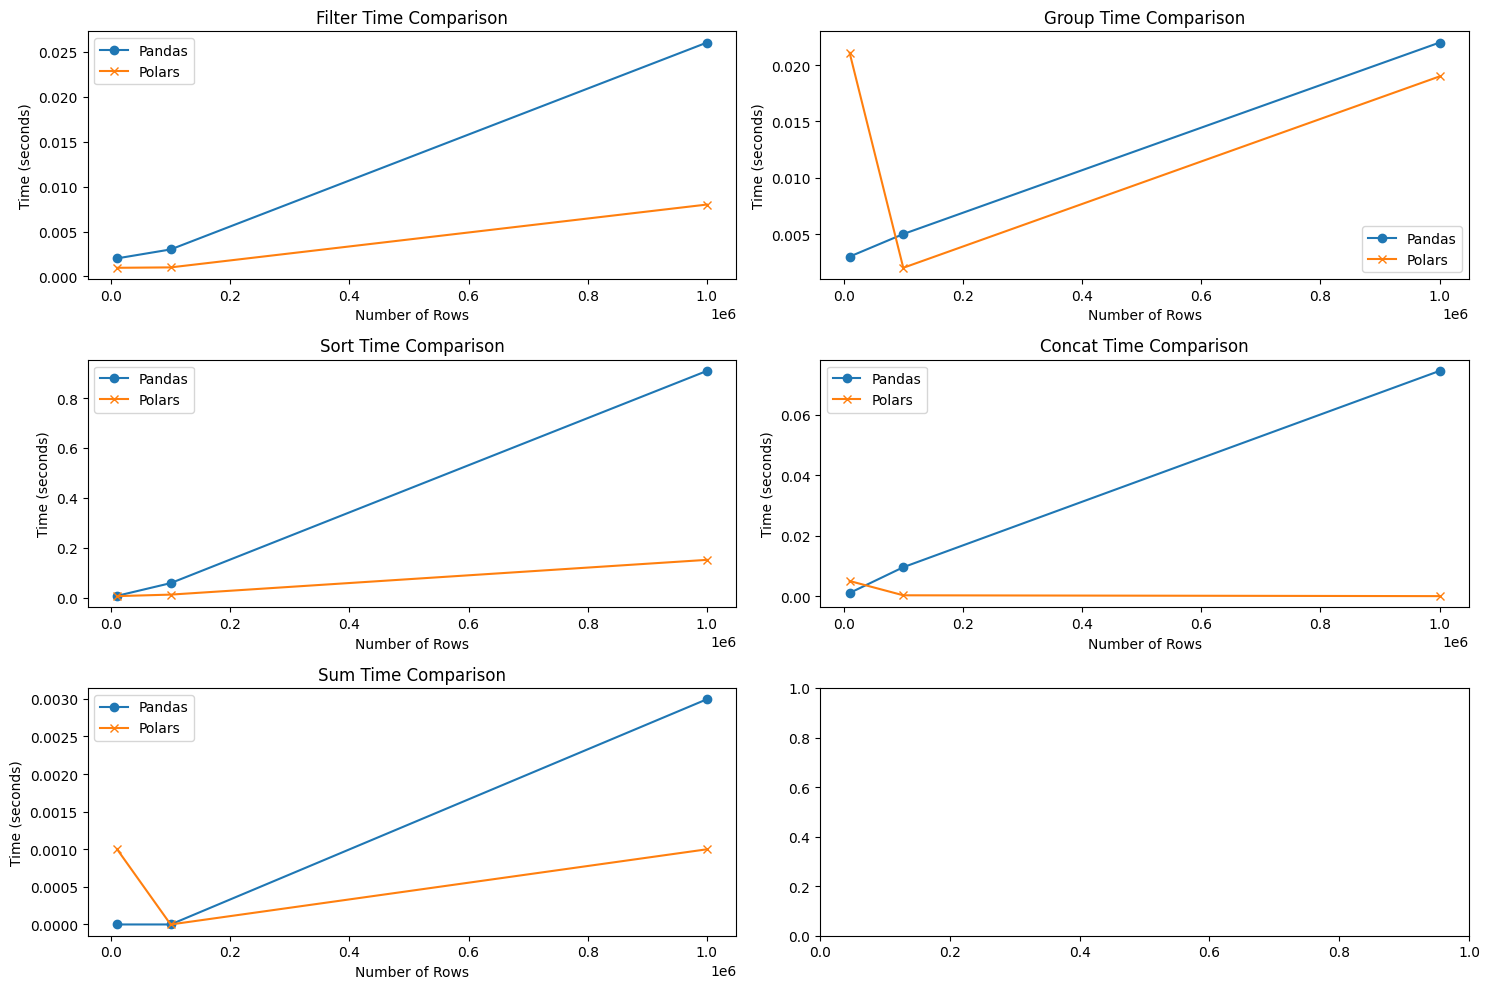

In [6]:
# 可视化对比速度
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
operations = ['Filter', 'Group', 'Sort', 'Concat', 'Sum']
for i, op in enumerate(operations):
    ax = axes[i // 2, i % 2]
    ax.plot(row_sizes, pandas_times_df[op], label='Pandas', marker='o')
    ax.plot(row_sizes, polars_times_df[op], label='Polars', marker='x')
    ax.set_title(f"{op} Time Comparison")
    ax.set_xlabel('Number of Rows')
    ax.set_ylabel('Time (seconds)')
    ax.legend()

plt.tight_layout()
plt.show()
